# Basic simulation template

This is a basic Tidy3D script showing the FDTD simulation of a delectric cube in the presence of a point dipole.

In [1]:
import numpy as np

# import the package and the web API
import tidy3d as td
import tidy3d.web as web


In [2]:
# set up parameters of simulation (length scales are micrometers)
grid_cells_per_wvl = 30
pml = td.PML()
sim_size = (4, 4, 4)
lambda0 = 1.0
freq0 = td.C_0 / lambda0
fwidth = freq0 / 10.0
run_time = 12.0 / fwidth

# create structure
dielectric = td.Medium.from_nk(n=2, k=0, freq=freq0)
square = td.Structure(
    geometry=td.Box(center=(0, 0, 0), size=(1.5, 1.5, 1.5)), medium=dielectric
)

# create source
source = td.UniformCurrentSource(
    center=(-1.5, 0, 0),
    size=(0, 0.4, 0.4),
    source_time=td.GaussianPulse(freq0=freq0, fwidth=fwidth),
    polarization="Ey",
)

# create monitor
monitor = td.FieldMonitor(
    fields=["Ex", "Ey", "Hz"],
    center=(0, 0, 0),
    size=(td.inf, td.inf, 0),
    freqs=[freq0],
    name="fields_on_plane",
    colocate=True,
)

# Initialize simulation
sim = td.Simulation(
    size=sim_size,
    grid_spec=td.GridSpec.auto(min_steps_per_wvl=grid_cells_per_wvl),
    structures=[square],
    sources=[source],
    monitors=[monitor],
    run_time=run_time,
    boundary_spec=td.BoundarySpec.all_sides(boundary=td.PML()),
)


In [3]:
print(
    f"simulation grid is shaped {sim.grid.num_cells} for {int(np.prod(sim.grid.num_cells)/1e6)} million cells."
)


simulation grid is shaped [192, 192, 192] for 7 million cells.


In [4]:
# run the simulation, download the data.
data = web.run(sim, task_name="quickstart", path="data/data.hdf5", verbose=False)


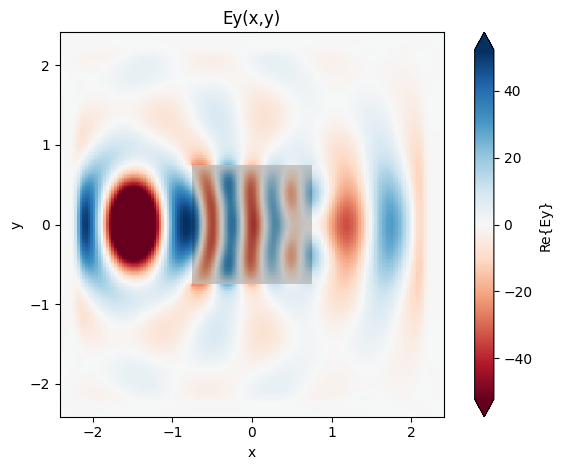

In [5]:
# plot the fields stored in the monitor
ax = data.plot_field("fields_on_plane", "Ey", z=0)
_ = ax.set_title("Ey(x,y)")
